In [1]:
# Support Vector Machines Project

The wheel-detection dataset contains measurements for 150 wheel defect readings from 4 sensors.


In [61]:
import seaborn as sns
import pandas as pd
defect = pd.read_csv("wheel-defect.csv")

Let's visualize the data and get you started!

## Exploratory Data Analysis

Time to put your data viz skills to the test! Try to recreate the following plots, make sure to import the libraries you'll need!

**Import some libraries you think you'll need.**

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

** Create a pairplot of the data set. Which defects seems to be the most separable?**

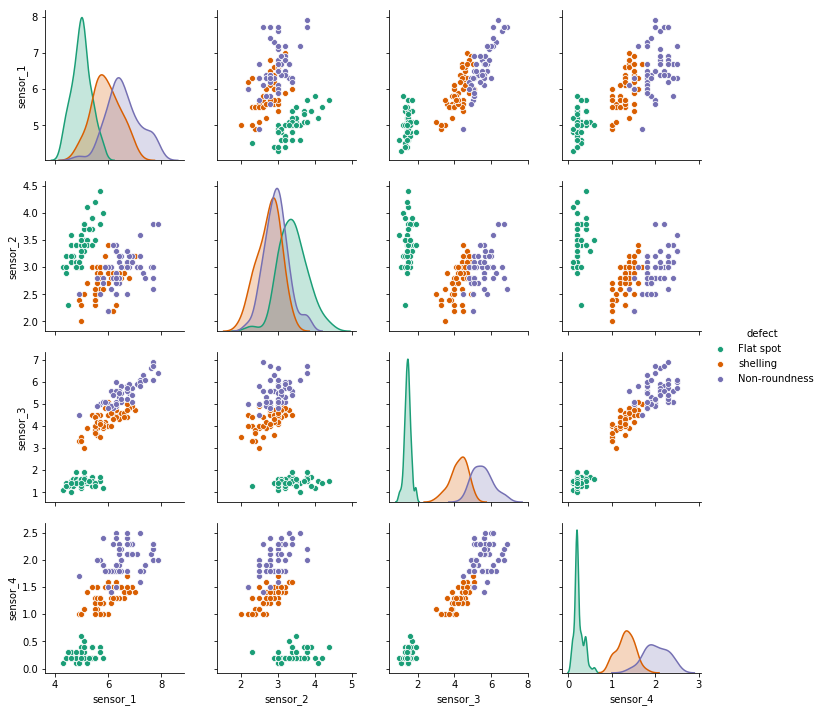

In [63]:
# Setosa is the most separable. 
sns.pairplot(defect,hue='defect',palette='Dark2')

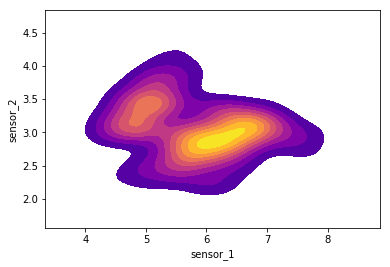

In [64]:
flatspot = defect[defect['defect']=='Flat spot']
sns.kdeplot( defect['sensor_1'], defect['sensor_2'],
                 cmap="plasma", shade=True, shade_lowest=False)

# Train Test Split

** Split your data into a training set and a testing set.**

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X =defect.drop('defect',axis=1)
y = defect['defect']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Train a Model

Now its time to train a Support Vector Machine Classifier. 

**Call the SVC() model from sklearn and fit the model to the training data.**

In [67]:
from sklearn.svm import SVC

In [68]:
svc_model = SVC()

In [69]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Model Evaluation

**Now get predictions from the model and create a confusion matrix and a classification report.**

In [70]:
predictions = svc_model.predict(X_test)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [72]:
print(confusion_matrix(y_test,predictions))

[[12  0  0]
 [ 0 16  2]
 [ 0  0 15]]


In [73]:
print(classification_report(y_test,predictions))

               precision    recall  f1-score   support

    Flat spot       1.00      1.00      1.00        12
Non-roundness       1.00      0.89      0.94        18
     shelling       0.88      1.00      0.94        15

  avg / total       0.96      0.96      0.96        45



Wow! You should have noticed that your model was pretty good! Let's see if we can tune the parameters to try to get even better (unlikely, and you probably would be satisfied with these results in real like because the data set is quite small, but I just want you to practice using GridSearch.

## Gridsearch Practice

** Import GridsearchCV from SciKit Learn.**

In [74]:
from sklearn.model_selection import GridSearchCV

**Create a dictionary called param_grid and fill out some parameters for C and gamma.**

In [75]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

** Create a GridSearchCV object and fit it to the training data.**

In [76]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=100, gamma=0.01 ...............................................
[CV] ................................ C=100, gamma=0.01, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................................ C=100, gamma=0.01, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

** Now take that grid model and create some predictions using the test set and create classification reports and confusion matrices for them. Were you able to improve?**

In [77]:
grid_predictions = grid.predict(X_test)

In [78]:
print(confusion_matrix(y_test,grid_predictions))

[[12  0  0]
 [ 0 18  0]
 [ 0  0 15]]


In [79]:
print(classification_report(y_test,grid_predictions))

               precision    recall  f1-score   support

    Flat spot       1.00      1.00      1.00        12
Non-roundness       1.00      1.00      1.00        18
     shelling       1.00      1.00      1.00        15

  avg / total       1.00      1.00      1.00        45



In [80]:
X_test

,sensor_1,sensor_2,sensor_3,sensor_4
117,7.7,3.8,6.7,2.2
138,6.0,3.0,4.8,1.8
135,7.7,3.0,6.1,2.3
115,6.4,3.2,5.3,2.3
121,5.6,2.8,4.9,2.0
140,6.7,3.1,5.6,2.4
52,6.9,3.1,4.9,1.5
84,5.4,3.0,4.5,1.5
104,6.5,3.0,5.8,2.2
55,5.7,2.8,4.5,1.3


In [81]:
grid_predictions

array(['Non-roundness', 'Non-roundness', 'Non-roundness', 'Non-roundness',
       'Non-roundness', 'Non-roundness', 'shelling', 'shelling',
       'Non-roundness', 'shelling', 'Flat spot', 'shelling', 'Flat spot',
       'Non-roundness', 'Flat spot', 'Flat spot', 'Non-roundness',
       'Flat spot', 'Non-roundness', 'Flat spot', 'shelling',
       'Non-roundness', 'shelling', 'Flat spot', 'Flat spot',
       'Non-roundness', 'shelling', 'Non-roundness', 'shelling',
       'shelling', 'shelling', 'Non-roundness', 'Non-roundness',
       'Non-roundness', 'shelling', 'shelling', 'shelling', 'Flat spot',
       'shelling', 'Flat spot', 'Flat spot', 'shelling', 'Non-roundness',
       'Non-roundness', 'Flat spot'], dtype=object)

In [82]:
report=X_test
report['predictions']=grid_predictions

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [83]:
report

,sensor_1,sensor_2,sensor_3,sensor_4,predictions
117,7.7,3.8,6.7,2.2,Non-roundness
138,6.0,3.0,4.8,1.8,Non-roundness
135,7.7,3.0,6.1,2.3,Non-roundness
115,6.4,3.2,5.3,2.3,Non-roundness
121,5.6,2.8,4.9,2.0,Non-roundness
140,6.7,3.1,5.6,2.4,Non-roundness
52,6.9,3.1,4.9,1.5,shelling
84,5.4,3.0,4.5,1.5,shelling
104,6.5,3.0,5.8,2.2,Non-roundness
55,5.7,2.8,4.5,1.3,shelling


In [84]:
#classifying single data
grid.predict([[4.0,3.4,1.5,0.5]])

array(['Flat spot'], dtype=object)

In [85]:
grid.predict([[6.0,3.4,4.5,1.5]])

array(['shelling'], dtype=object)